In [5]:
import sympy
import time
import pandas as pd
import sys
from tqdm import tqdm

sys.set_int_max_str_digits(0)

def is_prime(n):
    return sympy.isprime(n)

def find_twin_primes_your_method(number, limit,divisor=2):
    twin_primes = []
    primes_found = []
    maximum = 0

    for n in tqdm(range(number, limit, number), desc="Finding Twin Primes"):
        if n & 1 == 0:
            a = n // divisor
            p1 = a * n - 1
            p2 = a * n + 1

            if p1 % 6 == 1 or p1 % 6 == 5 or p2%6==1 or p2%6==5 :
                is_prime1 = is_prime(p1)
                if is_prime1:
                    primes_found.append(p1)
                    if p1 > maximum:
                        maximum = p1
                is_prime2 = is_prime(p2)
                if is_prime2:
                    primes_found.append(p2)
                    if p2 > maximum:
                        maximum = p2
                    if is_prime1:
                        twin_primes.append((p1, p2))

    return twin_primes, primes_found, maximum

def test_method(method, number, limit,divisior):
    start_time = time.time()
    twin_primes, primes_found, maximum = method(number, limit,divisior)
    end_time = time.time()
    return len(twin_primes), end_time - start_time, maximum, twin_primes, primes_found

def primes_info():
    while True:
        try:
            n = int(input("Enter the number of primes p# (n): "))
            #m= int(input("Enter exponent between 2 and 10, deault=4"))
            if n > 0:
              divisor = int(input("Enter integer divisior "))
              if divisor > 0:
                  break
              else:
                print("Please enter a positive integer.")
            else:
                print("Please enter a positive integer.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

    primes = [sympy.prime(i) for i in range(1, n + 1)]
    product = sympy.prod(primes)
    sys.set_int_max_str_digits(0)
    num_digits = len(str(product))

    print(f"Their product is: {product}")
    print(f"The number of digits in the product is: {num_digits}")
    return product, num_digits,divisor

def main():
    number, digits,divisor = primes_info()
    
    limit = 10**(digits + 3)

    print(f"In the range between the primordial: {number} and {limit}")
    print(limit // number, "numbers will be tested for primes")

    count_your_method, time_your_method, maximum, twin_primes, primes_found = test_method(
        find_twin_primes_your_method, number, limit,divisor
    )

    print(f"Your Method found twin primes - Count: {count_your_method} With total Time to run all script: {time_your_method}")
    print(f"Primordial number and the start: {number}, the end: {limit}")

    data_str = [(str(a), str(b)) for a, b in twin_primes]
    data_primes_to_csv = {
        'prime found': [str(a) for a in primes_found],
    }

    df_primes = pd.DataFrame(data_primes_to_csv)
    max_digit_prime = len(str(primes_found[-1])) if primes_found else 0
    min_digit_prime = len(str(primes_found[0])) if primes_found else 0

    if len(twin_primes) > 0:
        max_digit_twin = len(str(twin_primes[-1][-1]))
        min_digit_twin = len(str(twin_primes[0][0]))
        length_twin = len(twin_primes)
    else:
        max_digit_twin = min_digit_twin = length_twin = 0

    length_primes = len(primes_found)

    df_primes.to_csv(f'primesCount_{length_primes}_Between_{min_digit_prime}_and_{max_digit_prime}_digitscrypto_{divisor}.txt', index=False, sep=",")
    print(" number of primes found",length_primes)
    df_twins = pd.DataFrame(data_str, columns=['Twin 1', 'Twin 2'])
    df_twins.to_csv(f'TwinsCount_{length_twin}_Between_{min_digit_prime}_and_{max_digit_prime}_digits_{divisor}.txt', index=False, sep=",")
    print("primes",length_primes,"twins",length_twin)
    print("Data has been written to output files")

if __name__ == "__main__":
    main()

Their product is: 95234295955664045637866322983541099503851634877058249810504965677237983920725153181735658070174733691272466121155561000563715116393639963341160972341800859753499609797548126625484096881479747980204659461887783057032257640208518804676636898292554093668958141169772645603685911130448360934060179075582550673197258789403647266656022374767053212788294561798506078619752905406075249200900417854509484971681199620057588324623004629858878147156771842798963521029793198439276167239890897344977186225102742636376129562350601955842931658833675413000115472907156376581567287393025586362617578973680196385689263376679156775061133652511690135851445570722265297472892871041728948513439928400171630040915374106186352726499918034204086802258052249536785577482760297357046736371904030
The number of digits in the product is: 767
In the range between the primordial: 9523429595566404563786632298354109950385163487705824981050496567723798392072515318173565807017473369127246612115556100056371511639363

Finding Twin Primes: 100%|██████████| 1050/1050 [07:19<00:00,  2.39it/s]

Your Method found twin primes - Count: 0 With total Time to run all script: 439.61782360076904
Primordial number and the start: 95234295955664045637866322983541099503851634877058249810504965677237983920725153181735658070174733691272466121155561000563715116393639963341160972341800859753499609797548126625484096881479747980204659461887783057032257640208518804676636898292554093668958141169772645603685911130448360934060179075582550673197258789403647266656022374767053212788294561798506078619752905406075249200900417854509484971681199620057588324623004629858878147156771842798963521029793198439276167239890897344977186225102742636376129562350601955842931658833675413000115472907156376581567287393025586362617578973680196385689263376679156775061133652511690135851445570722265297472892871041728948513439928400171630040915374106186352726499918034204086802258052249536785577482760297357046736371904030, the end: 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [ ]:
import sympy
import time
import pandas as pd
import sys
from tqdm import tqdm
import collections

sys.set_int_max_str_digits(0)

def is_prime(n):
    return sympy.isprime(n)

def find_twin_primes_your_method(number, limit,divisor=2):
    twin_primes = []
    primes_found = []
    maximum = 0

    for n in tqdm(range(number, limit, number), desc="Finding Twin Primes"):
        if n & 1 == 0:
            a = n // divisor
            p1 = a * n - 1
            p2 = a * n + 1

            if p1 % 6 == 1 or p1 % 6 == 5 or p2%6==1 or p2%6==5 :
                is_prime1 = is_prime(p1)
                if is_prime1:
                    primes_found.append(p1)
                    if p1 > maximum:
                        maximum = p1
                is_prime2 = is_prime(p2)
                if is_prime2:
                    primes_found.append(p2)
                    if p2 > maximum:
                        maximum = p2
                    if is_prime1:
                        twin_primes.append((p1, p2))

    return twin_primes, primes_found, maximum

def test_method(method, number, limit,divisior):
    start_time = time.time()
    twin_primes, primes_found, maximum = method(number, limit,divisior)
    end_time = time.time()
    return len(twin_primes), end_time - start_time, maximum, twin_primes, primes_found

def primes_info():
    while True:
        try:
            n = int(input("Enter the number of primes p# (n): "))
            #m= int(input("Enter exponent between 2 and 10, deault=4"))
            if n > 0:
              divisor = int(input("Enter integer divisior "))
              if divisor > 0:
                  break
              else:
                print("Please enter a positive integer.")
            else:
                print("Please enter a positive integer.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

    primes = [sympy.prime(i) for i in range(1, n + 1)]
    product = sympy.prod(primes)
    sys.set_int_max_str_digits(0)
    num_digits = len(str(product))

    print(f"Their product is: {product}")
    print(f"The number of digits in the product is: {num_digits}")
    return product, num_digits,divisor,n

def main():
    number, digits,divisor,n = primes_info()
    print("n=",n)
    add=4
    limit = 10**(digits + add)
    

    print(f"In the range between the primordial: {number} and {limit}")
    print(limit // number, "numbers will be tested for primes")

    count_your_method, time_your_method, maximum, twin_primes, primes_found = test_method(
        find_twin_primes_your_method, number, limit,divisor
    )

    print(f"Your Method found twin primes - Count: {count_your_method} With total Time to run all script: {time_your_method}")
    print(f"Primordial number and the start: {number}, the end: {limit}")

    data_str = [(str(a), str(b)) for a, b in twin_primes]
    data_primes_to_csv = {
        'prime found': [str(a) for a in primes_found],
    }

    df_primes = pd.DataFrame(data_primes_to_csv)
    max_digit_prime = len(str(primes_found[-1])) if primes_found else 0
    min_digit_prime = len(str(primes_found[0])) if primes_found else 0

    if len(twin_primes) > 0:
        max_digit_twin = len(str(twin_primes[-1][-1]))
        min_digit_twin = len(str(twin_primes[0][0]))
        length_twin = len(twin_primes)
    else:
        max_digit_twin = min_digit_twin = length_twin = 0

    length_primes = len(primes_found)

    df_primes.to_csv(f'primesCount_{length_primes}_Between_{min_digit_prime}_and_{max_digit_prime}_digitscrypto_{divisor}.txt', index=False, sep=",")
    print(" number of primes found",length_primes)
    df_twins = pd.DataFrame(data_str, columns=['Twin 1', 'Twin 2'])
    df_twins.to_csv(f'TwinsCount_{length_twin}_Between_{min_digit_prime}_and_{max_digit_prime}_digits_{divisor}.txt', index=False, sep=",")
    print("primes",length_primes,"twins",length_twin)
    print("Data has been written to output files")
    print(type(primes_found[0]))
    digit_lengths = [len(str(p)) for p in primes_found]
    digit_counts = collections.Counter(digit_lengths)
    # --- Step 4: Print the results in a readable format ---
    print("Prime Digit Count Summary:")
    print("--------------------------")

    # Sort the items by the digit number for a clean, ordered output
    # .items() gives us (key, value) pairs, which are (digit_length, count)
    for digit_length, count in sorted(digit_counts.items()):
        print(f"{digit_length} digits: {count} primes")

    print("--------------------------")
    total_primes = len(primes_found)
    print(f"Total primes found: {total_primes}")
    

if __name__ == "__main__":
    main()

Their product is: 4711930799906184953162487834760260422020574773409675520188634839616415335845034221205289256705544681972439104097777157991804380284218315038719444943990492579030720635990538452312528339864352999310398481791730017201031090
The number of digits in the product is: 220
n= 100
In the range between the primordial: 4711930799906184953162487834760260422020574773409675520188634839616415335845034221205289256705544681972439104097777157991804380284218315038719444943990492579030720635990538452312528339864352999310398481791730017201031090 and 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
21222 numbers will be tested for primes


Finding Twin Primes: 100%|██████████| 21222/21222 [04:28<00:00, 78.91it/s]

Your Method found twin primes - Count: 4 With total Time to run all script: 268.9357957839966
Primordial number and the start: 4711930799906184953162487834760260422020574773409675520188634839616415335845034221205289256705544681972439104097777157991804380284218315038719444943990492579030720635990538452312528339864352999310398481791730017201031090, the end: 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 number of primes found 468
primes 468 twins 4
Data has been written to output files
<class 'int'>
Prime Digit Count Summary:
--------------------------
443 digits: 2 primes
444 digits: 5 primes
445 digits: 15 primes
446 digits: 45 primes
447 digits: 154 primes
448 digits: 247 primes
--------------------------
Total primes found: 468


In [13]:
import sympy
import time
import pandas as pd
import sys
from tqdm import tqdm
import collections

sys.set_int_max_str_digits(0)

def is_prime(n):
    return sympy.isprime(n)

def find_twin_primes_your_method(number, limit,divisor=2):
    twin_primes = []
    primes_found = []
    maximum = 0

    for n in tqdm(range(number, limit, number), desc="Finding Twin Primes"):
        if n & 1 == 0:
            a = n // divisor
            p1 = a * n - 1
            p2 = a * n + 1

            if p1 % 6 == 1 or p1 % 6 == 5 or p2%6==1 or p2%6==5 :
                is_prime1 = is_prime(p1)
                if is_prime1:
                    primes_found.append(p1)
                    if p1 > maximum:
                        maximum = p1
                is_prime2 = is_prime(p2)
                if is_prime2:
                    primes_found.append(p2)
                    if p2 > maximum:
                        maximum = p2
                    if is_prime1:
                        twin_primes.append((p1, p2))

    return twin_primes, primes_found, maximum

def test_method(method, number, limit,divisior):
    start_time = time.time()
    twin_primes, primes_found, maximum = method(number, limit,divisior)
    end_time = time.time()
    return len(twin_primes), end_time - start_time, maximum, twin_primes, primes_found

def primes_info():
    while True:
        try:
            n = int(input("Enter the number of primes p# (n): "))
            #m= int(input("Enter exponent between 2 and 10, deault=4"))
            if n > 0:
              divisor = int(input("Enter integer divisior "))
              if divisor > 0:
                  break
              else:
                print("Please enter a positive integer.")
            else:
                print("Please enter a positive integer.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

    primes = [sympy.prime(i) for i in range(1, n + 1)]
    product = sympy.prod(primes)
    sys.set_int_max_str_digits(0)
    num_digits = len(str(product))

    print(f"Their product is: {product}")
    print(f"The number of digits in the product is: {num_digits}")
    return product, num_digits,divisor,n

def main():
    number, digits,divisor,n = primes_info()
    print("n=",n)
    add=4
    limit = 10**(digits + add)
    

    print(f"In the range between the primordial: {number} and {limit}")
    print(limit // number, "numbers will be tested for primes")

    count_your_method, time_your_method, maximum, twin_primes, primes_found = test_method(
        find_twin_primes_your_method, number, limit,divisor
    )

    print(f"Your Method found twin primes - Count: {count_your_method} With total Time to run all script: {time_your_method}")
    print(f"Primordial number and the start: {number}, the end: {limit}")

    data_str = [(str(a), str(b)) for a, b in twin_primes]
    data_primes_to_csv = {
        'prime found': [str(a) for a in primes_found],
    }

    df_primes = pd.DataFrame(data_primes_to_csv)
    max_digit_prime = len(str(primes_found[-1])) if primes_found else 0
    min_digit_prime = len(str(primes_found[0])) if primes_found else 0

    if len(twin_primes) > 0:
        max_digit_twin = len(str(twin_primes[-1][-1]))
        min_digit_twin = len(str(twin_primes[0][0]))
        length_twin = len(twin_primes)
    else:
        max_digit_twin = min_digit_twin = length_twin = 0

    length_primes = len(primes_found)

    df_primes.to_csv(f'primesCount_{length_primes}_Between_{min_digit_prime}_and_{max_digit_prime}_digitscrypto_{divisor}.txt', index=False, sep=",")
    print(" number of primes found",length_primes)
    df_twins = pd.DataFrame(data_str, columns=['Twin 1', 'Twin 2'])
    df_twins.to_csv(f'TwinsCount_{length_twin}_Between_{min_digit_prime}_and_{max_digit_prime}_digits_{divisor}.txt', index=False, sep=",")
    print("primes",length_primes,"twins",length_twin)
    print("Data has been written to output files")
    print(type(primes_found[0]))
    digit_lengths = [len(str(p)) for p in primes_found]
    digit_counts = collections.Counter(digit_lengths)
    # --- Step 4: Print the results in a readable format ---
    print("Prime Digit Count Summary:")
    print("--------------------------")

    # Sort the items by the digit number for a clean, ordered output
    # .items() gives us (key, value) pairs, which are (digit_length, count)
    for digit_length, count in sorted(digit_counts.items()):
        print(f"{digit_length} digits: {count} primes")

    print("--------------------------")
    total_primes = len(primes_found)
    print(f"Total primes found: {total_primes}")
    

if __name__ == "__main__":
    main()

Their product is: 557940830126698960967415390
The number of digits in the product is: 27
n= 20
In the range between the primordial: 557940830126698960967415390 and 10000000000000000000000000000000
17923 numbers will be tested for primes


Finding Twin Primes: 100%|██████████| 17923/17923 [00:01<00:00, 9891.31it/s]

Your Method found twin primes - Count: 52 With total Time to run all script: 1.8133742809295654
Primordial number and the start: 557940830126698960967415390, the end: 10000000000000000000000000000000
 number of primes found 1957
primes 1957 twins 52
Data has been written to output files
<class 'int'>
Prime Digit Count Summary:
--------------------------
56 digits: 3 primes
57 digits: 5 primes
58 digits: 17 primes
59 digits: 60 primes
60 digits: 173 primes
61 digits: 636 primes
62 digits: 1063 primes
--------------------------
Total primes found: 1957


In [17]:
import sympy
import time
import pandas as pd
import sys
from tqdm import tqdm
import collections
from tabulate import tabulate
import math

sys.set_int_max_str_digits(0)

def is_prime(n):
    return sympy.isprime(n)

# <<< NEW: Helper function for theoretical analysis >>>
def calculate_p_theoretical(digits):
    """
    Calculates the theoretical prime density for numbers of a given digit length.
    This uses the approximation 1/ln(x) from the Prime Number Theorem.
    """
    if digits < 2:
        return 0
    # Estimate the magnitude x as 10^(digits-1)
    x = 10**(digits - 1)
    # The density of primes around x is approximately 1 / ln(x)
    p_theoretical = 1 / math.log(x)
    return p_theoretical

def find_twin_primes_your_method(number, limit,divisor=2):
    twin_primes = []
    primes_found = []
    maximum = 0
    candidate_counts_by_digit = collections.Counter() # <<< NEW: Counter for all candidates

    for n in tqdm(range(number, limit, number), desc="Finding Primes"):
        if n & 1 == 0:
            a = n // divisor
            p1 = a * n - 1
            p2 = a * n + 1
            
            # <<< NEW: Log every candidate's digit length
            candidate_counts_by_digit[len(str(p1))] += 1
            candidate_counts_by_digit[len(str(p2))] += 1

            # Your original primality testing logic remains the same
            if p1 % 6 == 1 or p1 % 6 == 5 or p2%6==1 or p2%6==5 :
                is_prime1 = is_prime(p1)
                if is_prime1:
                    primes_found.append(p1)
                    if p1 > maximum:
                        maximum = p1
                is_prime2 = is_prime(p2)
                if is_prime2:
                    primes_found.append(p2)
                    if p2 > maximum:
                        maximum = p2
                    if is_prime1:
                        twin_primes.append((p1, p2))

    # <<< MODIFIED: Return the new counter
    return twin_primes, primes_found, maximum, candidate_counts_by_digit

def test_method(method, number, limit,divisior):
    start_time = time.time()
    # <<< MODIFIED: Receive the new counter
    twin_primes, primes_found, maximum, candidate_counts = method(number, limit,divisior)
    end_time = time.time()
    # <<< MODIFIED: Return the new counter
    return len(twin_primes), end_time - start_time, maximum, twin_primes, primes_found, candidate_counts

def primes_info():
    while True:
        try:
            n = int(input("Enter the number of primes p# (n): "))
            if n > 0:
              divisor = int(input("Enter integer divisior "))
              if divisor > 0:
                  break
              else:
                print("Please enter a positive integer.")
            else:
                print("Please enter a positive integer.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

    primes = [sympy.prime(i) for i in range(1, n + 1)]
    product = sympy.prod(primes)
    sys.set_int_max_str_digits(0)
    num_digits = len(str(product))

    print(f"Their product is: {product}")
    print(f"The number of digits in the product is: {num_digits}")
    return product, num_digits,divisor,n

def main():
    number, digits,divisor,n = primes_info()
    print("n=",n)
    add=4 # You can adjust this value
    limit = 10**(digits + add)
    
    print(f"In the range between the primordial: {number} and {limit}")
    print(limit // number, "numbers will be tested for primes")

    # <<< MODIFIED: Receive the new counter from test_method
    count_your_method, time_your_method, maximum, twin_primes, primes_found, candidate_counts = test_method(
        find_twin_primes_your_method, number, limit,divisor
    )

    print(f"Your Method found twin primes - Count: {count_your_method} With total Time to run all script: {time_your_method}")
    print(f"Primordial number and the start: {number}, the end: {limit}")

    # --- Your original file output logic (unchanged) ---
    data_str = [(str(a), str(b)) for a, b in twin_primes]
    data_primes_to_csv = {'prime found': [str(a) for a in primes_found]}
    df_primes = pd.DataFrame(data_primes_to_csv)
    max_digit_prime = len(str(primes_found[-1])) if primes_found else 0
    min_digit_prime = len(str(primes_found[0])) if primes_found else 0
    length_twin = len(twin_primes) if twin_primes else 0
    length_primes = len(primes_found)
    df_primes.to_csv(f'primesCount_{length_primes}_Between_{min_digit_prime}_and_{max_digit_prime}_digitscrypto_{divisor}.txt', index=False, sep=",")
    df_twins = pd.DataFrame(data_str, columns=['Twin 1', 'Twin 2'])
    df_twins.to_csv(f'TwinsCount_{length_twin}_Between_{min_digit_prime}_and_{max_digit_prime}_digits_{divisor}.txt', index=False, sep=",")
    print("primes",length_primes,"twins",length_twin)
    print("Data has been written to output files")
    
    # --- NEW: Detailed Per-Group Analysis Section ---
    print("\n" + "="*50)
    print("### Detailed Prime vs. Candidate Summary ###")
    print("="*50)
    
    if primes_found:
        # Count primes by digit length
        prime_digit_counts = collections.Counter([len(str(p)) for p in primes_found])
    else:
        prime_digit_counts = collections.Counter()

    # Iterate through the sorted candidate digit lengths
    for digit_length, num_candidates in sorted(candidate_counts.items()):
        # Get the number of primes for this digit length (defaults to 0 if none)
        num_primes = prime_digit_counts.get(digit_length, 0)
        
        hit_rate_str = ""
        if num_primes > 0:
            hit_rate = (num_primes / num_candidates) * 100
            hit_rate_str = f"({hit_rate:.2f}% hit rate)"

        print(f"{digit_length} digits: {num_primes} primes found out of {num_candidates} candidates tested {hit_rate_str}")
    
    print("="*50)
    total_primes = len(primes_found)
    total_candidates = sum(candidate_counts.values())
    print(f"Total: {total_primes} primes found out of {total_candidates} candidates tested.")

    print(f"Your Method found twin primes - Count: {count_your_method} With total Time to run all script: {time_your_method}")

    # --- File output logic (unchanged) ---
    # ... (code omitted for brevity, it is unchanged) ...
    print("primes",len(primes_found),"twins",len(twin_primes))
    print("Data has been written to output files")
    
    # <<< NEW: Final Analysis and Tabulated Output Section >>>
    print("\n" + "="*80)
    print("### Efficacy Analysis vs. Prime Number Theorem (PNT) ###")
    print("="*80)
    
    analysis_results = []
    headers = [
        "Digit Group",
        "Primes Found",
        "Candidates Tested",
        "Empirical Rate",
        "PNT Rate (li(x)/x)",
        "Efficacy Ratio"
    ]

    if primes_found:
        prime_digit_counts = collections.Counter([len(str(p)) for p in primes_found])
    else:
        prime_digit_counts = collections.Counter()

    # Iterate through the sorted candidate digit lengths
    for digit_length, num_candidates in sorted(candidate_counts.items()):
        num_primes = prime_digit_counts.get(digit_length, 0)
        
        # Calculate rates
        p_empirical = num_primes / num_candidates if num_candidates > 0 else 0
        p_theoretical = calculate_p_theoretical(digit_length)
        
        efficacy_ratio = p_empirical / p_theoretical if p_theoretical > 0 else 0
        
        # Append formatted row to results list
        analysis_results.append([
            digit_length,
            num_primes,
            num_candidates,
            f"{p_empirical:.4%}",
            f"{p_theoretical:.4%}",
            f"{efficacy_ratio:.1f}x"
        ])

    # Print the final table
    print(tabulate(analysis_results, headers=headers, tablefmt="grid"))
    print("\nEfficacy Ratio = (Your Method's Hit Rate) / (Prime Number Theorem's Predicted Hit Rate)")


if __name__ == "__main__":
    main()

Their product is: 4677492136955425281519937426128454234685227725149365904986290181439985622385431811441388070759331722463653363435049401912021447346969831994694700863301814601935485044229150510387831958439379310
The number of digits in the product is: 193
n= 90
In the range between the primordial: 4677492136955425281519937426128454234685227725149365904986290181439985622385431811441388070759331722463653363435049401912021447346969831994694700863301814601935485044229150510387831958439379310 and 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
21378 numbers will be tested for primes


Finding Primes: 100%|██████████| 21378/21378 [03:14<00:00, 109.71it/s]

Your Method found twin primes - Count: 2 With total Time to run all script: 194.8622031211853
Primordial number and the start: 4677492136955425281519937426128454234685227725149365904986290181439985622385431811441388070759331722463653363435049401912021447346969831994694700863301814601935485044229150510387831958439379310, the end: 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
primes 547 twins 2
Data has been written to output files

### Detailed Prime vs. Candidate Summary ###
386 digits: 0 primes found out of 6 candidates tested 
387 digits: 0 primes found out of 12 candidates tested 
388 digits: 1 primes found out of 42 candidates tested (2.38% hit rate)
389 digits: 2 primes found out of 130 candidates tested (1.54% hit rate)
390 digits: 5 primes found out of 414 candidates tested (1.21% hit rate)
391 digits: 23 primes found out of 130

In [18]:
import sympy
import time
import pandas as pd
import sys
from tqdm import tqdm
import collections
from tabulate import tabulate
import math
from scipy.stats import binom

sys.set_int_max_str_digits(0)

def is_prime(n):
    return sympy.isprime(n)

# <<< NEW: Helper function for theoretical analysis >>>
def calculate_p_theoretical(digits):
    """
    Calculates the theoretical prime density for numbers of a given digit length.
    This uses the approximation 1/ln(x) from the Prime Number Theorem.
    """
    if digits < 2:
        return 0
    # Estimate the magnitude x as 10^(digits-1)
    x = 10**(digits - 1)
    # The density of primes around x is approximately 1 / ln(x)
    p_theoretical = 1 / math.log(x)
    return p_theoretical

def calculate_binomial_probability(num_successes, num_trials, prob_success):
    """
    Calculates the probability of getting 'num_successes' or more results
    in 'num_trials', given a baseline 'prob_success'.
    This is known as the survival function (1 - CDF).
    """
    if num_trials == 0: return 1.0
    # We use num_successes - 1 because the survival function (sf) calculates P(X > k).
    # We want P(X >= k), which is P(X > k-1).
    return binom.sf(num_successes - 1, num_trials, prob_success)

def find_twin_primes_your_method(number, limit,divisor=2):
    twin_primes = []
    primes_found = []
    maximum = 0
    candidate_counts_by_digit = collections.Counter() # <<< NEW: Counter for all candidates

    for n in tqdm(range(number, limit, number), desc="Finding Primes"):
        if n & 1 == 0:
            a = n // divisor
            p1 = a * n - 1
            p2 = a * n + 1
            
            # <<< NEW: Log every candidate's digit length
            candidate_counts_by_digit[len(str(p1))] += 1
            candidate_counts_by_digit[len(str(p2))] += 1

            # Your original primality testing logic remains the same
            if p1 % 6 == 1 or p1 % 6 == 5 or p2%6==1 or p2%6==5 :
                is_prime1 = is_prime(p1)
                if is_prime1:
                    primes_found.append(p1)
                    if p1 > maximum:
                        maximum = p1
                is_prime2 = is_prime(p2)
                if is_prime2:
                    primes_found.append(p2)
                    if p2 > maximum:
                        maximum = p2
                    if is_prime1:
                        twin_primes.append((p1, p2))

    # <<< MODIFIED: Return the new counter
    return twin_primes, primes_found, maximum, candidate_counts_by_digit

def test_method(method, number, limit,divisior):
    start_time = time.time()
    # <<< MODIFIED: Receive the new counter
    twin_primes, primes_found, maximum, candidate_counts = method(number, limit,divisior)
    end_time = time.time()
    # <<< MODIFIED: Return the new counter
    return len(twin_primes), end_time - start_time, maximum, twin_primes, primes_found, candidate_counts

def primes_info():
    while True:
        try:
            n = int(input("Enter the number of primes p# (n): "))
            if n > 0:
              divisor = int(input("Enter integer divisior "))
              if divisor > 0:
                  break
              else:
                print("Please enter a positive integer.")
            else:
                print("Please enter a positive integer.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

    primes = [sympy.prime(i) for i in range(1, n + 1)]
    product = sympy.prod(primes)
    sys.set_int_max_str_digits(0)
    num_digits = len(str(product))

    print(f"Their product is: {product}")
    print(f"The number of digits in the product is: {num_digits}")
    return product, num_digits,divisor,n

def main():
    number, digits,divisor,n = primes_info()
    print("n=",n)
    add=4 # You can adjust this value
    limit = 10**(digits + add)
    
    print(f"In the range between the primordial: {number} and {limit}")
    print(limit // number, "numbers will be tested for primes")

    # <<< MODIFIED: Receive the new counter from test_method
    count_your_method, time_your_method, maximum, twin_primes, primes_found, candidate_counts = test_method(
        find_twin_primes_your_method, number, limit,divisor
    )

    print(f"Your Method found twin primes - Count: {count_your_method} With total Time to run all script: {time_your_method}")
    print(f"Primordial number and the start: {number}, the end: {limit}")

    # --- Your original file output logic (unchanged) ---
    data_str = [(str(a), str(b)) for a, b in twin_primes]
    data_primes_to_csv = {'prime found': [str(a) for a in primes_found]}
    df_primes = pd.DataFrame(data_primes_to_csv)
    max_digit_prime = len(str(primes_found[-1])) if primes_found else 0
    min_digit_prime = len(str(primes_found[0])) if primes_found else 0
    length_twin = len(twin_primes) if twin_primes else 0
    length_primes = len(primes_found)
    df_primes.to_csv(f'primesCount_{length_primes}_Between_{min_digit_prime}_and_{max_digit_prime}_digitscrypto_{divisor}.txt', index=False, sep=",")
    df_twins = pd.DataFrame(data_str, columns=['Twin 1', 'Twin 2'])
    df_twins.to_csv(f'TwinsCount_{length_twin}_Between_{min_digit_prime}_and_{max_digit_prime}_digits_{divisor}.txt', index=False, sep=",")
    print("primes",length_primes,"twins",length_twin)
    print("Data has been written to output files")
    
    # --- NEW: Detailed Per-Group Analysis Section ---
    print("\n" + "="*50)
    print("### Detailed Prime vs. Candidate Summary ###")
    print("="*50)
    
    if primes_found:
        # Count primes by digit length
        prime_digit_counts = collections.Counter([len(str(p)) for p in primes_found])
    else:
        prime_digit_counts = collections.Counter()

    # Iterate through the sorted candidate digit lengths
    for digit_length, num_candidates in sorted(candidate_counts.items()):
        # Get the number of primes for this digit length (defaults to 0 if none)
        num_primes = prime_digit_counts.get(digit_length, 0)
        
        hit_rate_str = ""
        if num_primes > 0:
            hit_rate = (num_primes / num_candidates) * 100
            hit_rate_str = f"({hit_rate:.2f}% hit rate)"

        print(f"{digit_length} digits: {num_primes} primes found out of {num_candidates} candidates tested {hit_rate_str}")
    
    print("="*50)
    total_primes = len(primes_found)
    total_candidates = sum(candidate_counts.values())
    print(f"Total: {total_primes} primes found out of {total_candidates} candidates tested.")

    print(f"Your Method found twin primes - Count: {count_your_method} With total Time to run all script: {time_your_method}")

    # --- File output logic (unchanged) ---
    # ... (code omitted for brevity, it is unchanged) ...
    print("primes",len(primes_found),"twins",len(twin_primes))
    print("Data has been written to output files")
    
    # <<< NEW: Final Analysis and Tabulated Output Section >>>
    print("\n" + "="*80)
    print("### Efficacy Analysis vs. Prime Number Theorem (PNT) ###")
    print("="*80)
    
    analysis_results = []
    headers = [
        "Digit Group",
        "Primes Found",
        "Candidates Tested",
        "Empirical Rate",
        "PNT Rate (li(x)/x)",
        "Efficacy Ratio"
    ]

    if primes_found:
        prime_digit_counts = collections.Counter([len(str(p)) for p in primes_found])
    else:
        prime_digit_counts = collections.Counter()

    # Iterate through the sorted candidate digit lengths
    for digit_length, num_candidates in sorted(candidate_counts.items()):
        num_primes = prime_digit_counts.get(digit_length, 0)
        
        # Calculate rates
        p_empirical = num_primes / num_candidates if num_candidates > 0 else 0
        p_theoretical = calculate_p_theoretical(digit_length)
        
        efficacy_ratio = p_empirical / p_theoretical if p_theoretical > 0 else 0
        
        # Append formatted row to results list
        analysis_results.append([
            digit_length,
            num_primes,
            num_candidates,
            f"{p_empirical:.4%}",
            f"{p_theoretical:.4%}",
            f"{efficacy_ratio:.1f}x"
        ])

    # Print the final table
    print(tabulate(analysis_results, headers=headers, tablefmt="grid"))
    print("\nEfficacy Ratio = (Your Method's Hit Rate) / (Prime Number Theorem's Predicted Hit Rate)")

    print("\n" + "="*100)
    print("### Final Efficacy and Statistical Significance Analysis ###")
    print("="*100)
    
    analysis_results = []
    headers = [
        "Digit Group",
        "Primes / Candidates",
        "Empirical Rate",
        "PNT Rate",
        "Efficacy Ratio",
        "Prob. of Result by Chance" # New Column
    ]

    prime_digit_counts = collections.Counter([len(str(p)) for p in primes_found]) if primes_found else collections.Counter()

    for digit_length, num_candidates in sorted(candidate_counts.items()):
        num_primes = prime_digit_counts.get(digit_length, 0)
        
        p_empirical = num_primes / num_candidates if num_candidates > 0 else 0
        p_theoretical = calculate_p_theoretical(digit_length)
        efficacy_ratio = p_empirical / p_theoretical if p_theoretical > 0 else 0
        
        # Calculate the new statistical probability
        chance_prob = calculate_binomial_probability(num_primes, num_candidates, p_theoretical)
        
        analysis_results.append([
            digit_length,
            f"{num_primes} / {num_candidates}",
            f"{p_empirical:.4%}",
            f"{p_theoretical:.4%}",
            f"{efficacy_ratio:.1f}x",
            f"{chance_prob:.20f}" # Format as scientific notation
        ])

    print(tabulate(analysis_results, headers=headers, tablefmt="grid"))
    print("\n'Prob. of Result by Chance' shows the probability of achieving your number of primes (or more)")
    print("if your algorithm was only as good as a random search. Very small numbers prove your result is not a fluke.")



if __name__ == "__main__":
    main()

Their product is: 494697569060000899157342200834877659386841369758202142576728628981294561344721092580657063284960382680477661460593011681011056888931695377394490974678507144040915517350125441953292843781256819277265406992037549145743575487419768351379847824837464873244814341060252766153399288279615942405758681859575741468496401774803402967536755490895918348280950291497110788567815997695727925468308028191503201770805973301638629875650244034607953336692624777810974333644320694314373273949039914503596369029428054392708203880710
The number of digits in the product is: 513
n= 200
In the range between the primordial: 49469756906000089915734220083487765938684136975820214257672862898129456134472109258065706328496038268047766146059301168101105688893169537739449097467850714404091551735012544195329284378125681927726540699203754914574357548741976835137984782483746487324481434106025276615339928827961594240575868185957574146849640177480340296753675549089591834828095029149711078856781599769572792546

Finding Primes:  24%|██▍       | 4861/20214 [10:53<34:24,  7.44it/s]  


KeyboardInterrupt: 

In [1]:
import sympy
import time
import pandas as pd
import sys
from tqdm import tqdm
import collections
from tabulate import tabulate
import math
from scipy.stats import binom

sys.set_int_max_str_digits(0)

def is_prime(n):
    return sympy.isprime(n)

def calculate_p_theoretical(digits):
    if digits < 2: return 0
    x = 10**(digits - 1)
    return 1 / math.log(x)

def calculate_binomial_probability(num_successes, num_trials, prob_success):
    if num_trials == 0: return 1.0
    return binom.sf(num_successes - 1, num_trials, prob_success)

def find_twin_primes_your_method(number, limit,divisor=2):
    twin_primes = []
    primes_found = []
    maximum = 0
    candidate_counts_by_digit = collections.Counter()

    for n in tqdm(range(number, limit, number), desc="Finding Primes"):
        if n & 1 == 0:
            a = n // divisor
            p1 = a * n - 1
            p2 = a * n + 1
            
            candidate_counts_by_digit[len(str(p1))] += 1
            candidate_counts_by_digit[len(str(p2))] += 1

            # Note: The 'p1 % 6' checks are optimizations but sympy.isprime is very fast and does this internally.
            # Keeping them is fine, but they aren't strictly necessary.
            is_prime1 = is_prime(p1)
            is_prime2 = is_prime(p2)
            
            if is_prime1:
                primes_found.append(p1)
                if p1 > maximum:
                    maximum = p1
            if is_prime2:
                primes_found.append(p2)
                if p2 > maximum:
                    maximum = p2
            
            # <<< MODIFIED: Corrected twin prime logic >>>
            if is_prime1 and is_prime2:
                # Ensure they are actually twins (p2 - p1 == 2)
                if p2 - p1 == 2:
                    twin_primes.append((p1, p2))

    return twin_primes, primes_found, maximum, candidate_counts_by_digit

def test_method(method, number, limit,divisior):
    start_time = time.time()
    twin_primes, primes_found, maximum, candidate_counts = method(number, limit,divisior)
    end_time = time.time()
    return len(twin_primes), end_time - start_time, maximum, twin_primes, primes_found, candidate_counts

def primes_info():
    while True:
        try:
            n = int(input("Enter the number of primes p# (n): "))
            if n > 0:
              divisor = int(input("Enter integer divisior "))
              if divisor > 0:
                  break
              else:
                print("Please enter a positive integer.")
            else:
                print("Please enter a positive integer.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

    primes = [sympy.prime(i) for i in range(1, n + 1)]
    product = sympy.prod(primes)
    num_digits = len(str(product))

    print(f"\nPrimorial P_{n}# has {num_digits} digits.")
    return product, num_digits, divisor, n

def main():
    number, digits, divisor, n = primes_info()
    print("n=", n)
    add = 3
    limit = 10**(digits + add)
    
    # <<< MODIFIED: Removed the incorrect, premature candidate count message >>>
    print(f"Searching for primes based on P_{n}#...")

    count_your_method, time_your_method, maximum, twin_primes, primes_found, candidate_counts = test_method(
        find_twin_primes_your_method, number, limit, divisor
    )

    # <<< NEW: Calculate the TRUE total number of candidates AFTER the test is done >>>
    total_candidates = sum(candidate_counts.values())
    
    print("\n" + "="*50)
    print("### Run Summary ###")
    print("="*50)
    print(f"Total time for calculation: {time_your_method:.2f} seconds")
    print(f"Total candidates tested:    {total_candidates}")
    print(f"Total primes found:         {len(primes_found)}")
    print(f"Total twin primes found:    {count_your_method}")

    # --- File Output Logic ---
    if primes_found:
        data_str = [(str(a), str(b)) for a, b in twin_primes]
        data_primes_to_csv = {'prime found': [str(p) for p in primes_found]}
        df_primes = pd.DataFrame(data_primes_to_csv)
        max_digit_prime = len(str(primes_found[-1]))
        min_digit_prime = len(str(primes_found[0]))
        
        df_primes.to_csv(f'primesCount_{len(primes_found)}_n{n}_d{divisor}.txt', index=False, sep=",")
        if twin_primes:
            df_twins = pd.DataFrame(data_str, columns=['Twin 1', 'Twin 2'])
            df_twins.to_csv(f'TwinsCount_{len(twin_primes)}_n{n}_d{divisor}.txt', index=False, sep=",")
        print("\nPrime and Twin data saved to output files.")

    # --- Final Analysis Table ---
    print("\n" + "="*100)
    print("### Final Efficacy and Statistical Significance Analysis ###")
    print("="*100)
    
    analysis_results = []
    headers = [
        "Digit Group",
        "Primes / Candidates",
        "Empirical Rate",
        "PNT Rate",
        "Efficacy Ratio",
        "Prob. of Result by Chance"
    ]

    prime_digit_counts = collections.Counter([len(str(p)) for p in primes_found]) if primes_found else collections.Counter()

    for digit_length, num_candidates in sorted(candidate_counts.items()):
        num_primes = prime_digit_counts.get(digit_length, 0)
        
        p_empirical = num_primes / num_candidates if num_candidates > 0 else 0
        p_theoretical = calculate_p_theoretical(digit_length)
        efficacy_ratio = p_empirical / p_theoretical if p_theoretical > 0 else 0
        chance_prob = calculate_binomial_probability(num_primes, num_candidates, p_theoretical)
        
        analysis_results.append([
            digit_length,
            f"{num_primes} / {num_candidates}",
            f"{p_empirical:.4%}",
            f"{p_theoretical:.4%}",
            f"{efficacy_ratio:.1f}x",
            f"{chance_prob:.2e}"  # <<< MODIFIED: Scientific notation is better here
        ])

    print(tabulate(analysis_results, headers=headers, tablefmt="grid"))
    print("\n'Prob. of Result by Chance' shows the probability of achieving your number of primes (or more)")
    print("if your algorithm was only as good as a random search. Very small numbers prove your result is not a fluke.")

if __name__ == "__main__":
    main()


Primorial P_250# has 671 digits.
n= 250
Searching for primes based on P_250#...


Finding Primes:  59%|█████▉    | 4685/7970 [22:46<15:58,  3.43it/s]


KeyboardInterrupt: 


Primorial P_20# has 27 digits.
Theoretical prime enhancement E_prime: 7.82x
Theoretical twin enhancement E_twin: 23.13x
n= 20
Searching for primes based on P_20#...


Finding Primes: 100%|██████████| 1792/1792 [00:00<00:00, 6844.33it/s]



### Run Summary ###
Time: 0.26s | Cand: 3584 | Primes: 180 | Twins: 3

### Detailed Stats for Primes and Twins ###

+-------+--------+-------+---------+---------+-----------+----------+-------+---------+-----------+----------+---------+
|   Dig |   Cand |   #Pr | %Pr     | %PNT    | EffPNTx   |     pPNT |   #Tw | %Tw     | %TwinTh   | EffTwx   |   pTwin |
+=======+========+=======+=========+=========+===========+==========+=======+=========+===========+==========+=========+
|    54 |      4 |     0 | 0.000%% | 0.819%% | 0.00x     | 1        |     0 | 0.000%% | 0.009%%   | 0.00x    | 1       |
+-------+--------+-------+---------+---------+-----------+----------+-------+---------+-----------+----------+---------+
|    55 |     12 |     0 | 0.000%% | 0.804%% | 0.00x     | 1        |     0 | 0.000%% | 0.009%%   | 0.00x    | 1       |
+-------+--------+-------+---------+---------+-----------+----------+-------+---------+-----------+----------+---------+
|    56 |     34 |     3 | 8.824%% |

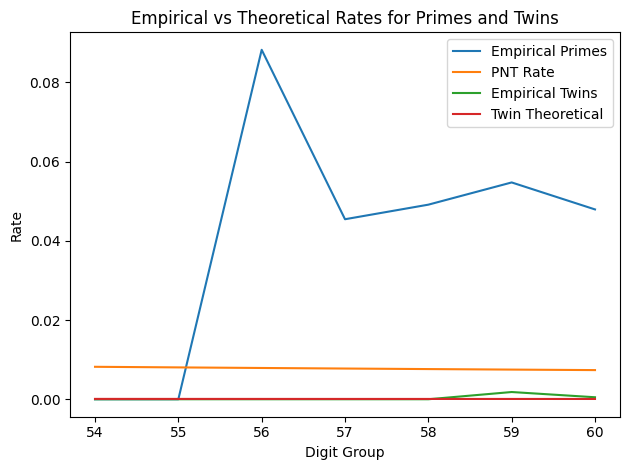

In [2]:
import sympy
import time
import pandas as pd
import sys
from tqdm import tqdm
import collections
from tabulate import tabulate
import math
from scipy.stats import binom
import matplotlib.pyplot as plt

sys.set_int_max_str_digits(0)

# --- Primality Helpers ---
def is_prime(n):
    return sympy.isprime(n)

# --- Enhancement Calculations ---
def compute_prime_enhancement(prime_list):
    """
    Computes enhancement factor E_prime = prod_{q in prime_list} q/(q-1)
    """
    enh = 1.0
    for q in prime_list:
        enh *= q / (q - 1)
    return enh


def compute_twin_enhancement(prime_list):
    """
    Computes enhancement factor E_twin = prod_{q in prime_list} q/(q-2)
    """
    enh = 1.0
    for q in prime_list:
        if q > 2:
            enh *= q / (q - 2)
    return enh

# --- Theoretical Rates ---
C2 = 0.66016  # Hardy–Littlewood twin constant

def pnt_rate(digits: int) -> float:
    if digits < 2:
        return 0.0
    return 1.0 / ((digits - 1) * math.log(10))


def twin_rate(digits: int) -> float:
    if digits < 3:
        return 0.0
    ln_term = (digits - 1) * math.log(10)
    return 2 * C2 / (ln_term * ln_term)


def binomial_p_value(successes: int, trials: int, p0: float) -> float:
    if trials == 0:
        return 1.0
    return binom.sf(successes - 1, trials, p0)

# --- Core Search Method ---
def find_twin_primes_your_method(number, limit, divisor=2):
    twin_primes = []
    primes_found = []
    candidate_counts_by_digit = collections.Counter()

    for n in tqdm(range(number, limit, number), desc="Finding Primes"):
        if n & 1 == 0:
            a = n // divisor
            p1 = a * n - 1
            p2 = a * n + 1
            d1, d2 = len(str(p1)), len(str(p2))
            candidate_counts_by_digit[d1] += 1
            candidate_counts_by_digit[d2] += 1
            if is_prime(p1):
                primes_found.append(p1)
            if is_prime(p2):
                primes_found.append(p2)
            if is_prime(p1) and is_prime(p2) and (p2 - p1 == 2):
                twin_primes.append((p1, p2))

    return twin_primes, primes_found, candidate_counts_by_digit

# --- Testing Wrapper ---
def test_method(method, number, limit, divisor):
    start = time.time()
    twins, primes, counts = method(number, limit, divisor)
    elapsed = time.time() - start
    return twins, primes, counts, elapsed

# --- Primorial Input ---
def primes_info():
    while True:
        try:
            n = int(input("Enter the number of primes p# (n): "))
            divisor = int(input("Enter integer divisor: "))
            if n > 0 and divisor > 0:
                break
            print("Please enter positive integers.")
        except ValueError:
            print("Invalid input. Please enter integers.")
    primes = [sympy.prime(i) for i in range(1, n + 1)]
    product = sympy.prod(primes)
    num_digits = len(str(product))
    print(f"\nPrimorial P_{n}# has {num_digits} digits.")
    # Compute theoretical enhancements
    E_pr = compute_prime_enhancement(primes)
    E_tw = compute_twin_enhancement(primes)
    print(f"Theoretical prime enhancement E_prime: {E_pr:.2f}x")
    print(f"Theoretical twin enhancement E_twin: {E_tw:.2f}x")
    return product, num_digits, divisor, n, primes

# --- Statistics Summarizer ---
def summarize_stats(candidate_counts, prime_counts, twin_counts):
    headers = [
        "Dig", "Cand",
        "#Pr", "%Pr", "%PNT", "EffPNTx", "pPNT",
        "#Tw", "%Tw", "%TwinTh", "EffTwx", "pTwin"
    ]
    rows = []
    data = []
    for d in sorted(candidate_counts):
        T = candidate_counts[d]
        m_pr = prime_counts.get(d, 0)
        m_tw = twin_counts.get(d, 0)
        p_pr = m_pr / T if T else 0.0
        p_tw = m_tw / T if T else 0.0
        p_pnt = pnt_rate(d)
        p_htw = twin_rate(d)
        rows.append([
            d, T,
            m_pr, f"{p_pr*100:.3f}%%", f"{p_pnt*100:.3f}%%", f"{(p_pr/p_pnt):.2f}x", f"{binomial_p_value(m_pr,T,p_pnt):.2e}",
            m_tw, f"{p_tw*100:.3f}%%", f"{p_htw*100:.3f}%%", f"{(p_tw/p_htw):.2f}x", f"{binomial_p_value(m_tw,T,p_htw):.2e}"
        ])
        data.append((d, p_pr, p_pnt, p_tw, p_htw))
    print(tabulate(rows, headers=headers, tablefmt="grid"))
    return data

# --- Plotting Function ---
def plot_rates(data):
    digits, emp_pr, pnt, emp_tw, twin_th = zip(*data)
    plt.figure()
    plt.plot(digits, emp_pr, label="Empirical Primes")
    plt.plot(digits, pnt, label="PNT Rate")
    plt.plot(digits, emp_tw, label="Empirical Twins")
    plt.plot(digits, twin_th, label="Twin Theoretical")
    plt.xlabel("Digit Group")
    plt.ylabel("Rate")
    plt.title("Empirical vs Theoretical Rates for Primes and Twins")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Main Execution ---
def main():
    num, digits, divisor, n, primes = primes_info()
    print("n=", n)
    limit = 10**(digits + 3)
    print(f"Searching for primes based on P_{n}#...")

    twins, prime_list, counts, elapsed = \
        test_method(find_twin_primes_your_method, num, limit, divisor)
    total_cand = sum(counts.values())

    print("\n" + "="*50)
    print("### Run Summary ###")
    print("="*50)
    print(f"Time: {elapsed:.2f}s | Cand: {total_cand} | Primes: {len(prime_list)} | Twins: {len(twins)}")

    prime_ct = collections.Counter(len(str(p)) for p in prime_list)
    twin_ct  = collections.Counter(len(str(p1)) for p1, p2 in twins)
    print("\n### Detailed Stats for Primes and Twins ###\n")
    data = summarize_stats(counts, prime_ct, twin_ct)

    # Plot the rates
    plot_rates(data)

if __name__ == "__main__":
    main()


Invalid input. Please enter integers.

Primorial P_4# has 3 digits.
Theoretical prime enhancement E_prime: 4.38x
Theoretical twin enhancement E_twin: 7.00x
n= 4
Searching for primes based on P_4#...


Finding Primes: 100%|██████████| 47619/47619 [00:00<00:00, 62910.42it/s]



### Run Summary ###
Time: 0.76s | Cand: 95238 | Primes: 15369 | Twins: 1226

### Detailed Stats for Primes and Twins ###

+-------+--------+-------+----------+----------+-----------+----------+-------+---------+-----------+----------+----------+
|   Dig |   Cand |   #Pr | %Pr      | %PNT     | EffPNTx   |     pPNT |   #Tw | %Tw     | %TwinTh   | EffTwx   |    pTwin |
+=======+========+=======+==========+==========+===========+==========+=======+=========+===========+==========+==========+
|     5 |      4 |     1 | 25.000%% | 10.857%% | 2.30x     | 0.369    |     0 | 0.000%% | 1.556%%   | 0.00x    | 1        |
+-------+--------+-------+----------+----------+-----------+----------+-------+---------+-----------+----------+----------+
|     6 |      8 |     0 | 0.000%%  | 8.686%%  | 0.00x     | 1        |     0 | 0.000%% | 0.996%%   | 0.00x    | 1        |
+-------+--------+-------+----------+----------+-----------+----------+-------+---------+-----------+----------+----------+
|     7 |

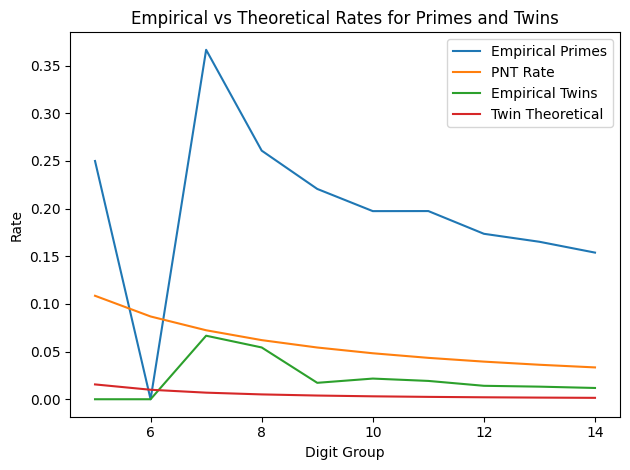

In [2]:
import sympy
import time
import pandas as pd
import sys
from tqdm import tqdm
import collections
from tabulate import tabulate
import math
from scipy.stats import binom
import matplotlib.pyplot as plt

sys.set_int_max_str_digits(0)

# --- Primality Helpers ---
def is_prime(n):
    return sympy.isprime(n)

# --- Enhancement Calculations ---
def compute_prime_enhancement(prime_list):
    """
    Computes enhancement factor E_prime = prod_{q in prime_list} q/(q-1)
    """
    enh = 1.0
    for q in prime_list:
        enh *= q / (q - 1)
    return enh


def compute_twin_enhancement(prime_list):
    """
    Computes enhancement factor E_twin = prod_{q in prime_list} q/(q-2)
    """
    enh = 1.0
    for q in prime_list:
        if q > 2:
            enh *= q / (q - 2)
    return enh

# --- Theoretical Rates ---
C2 = 0.66016  # Hardy–Littlewood twin constant

def pnt_rate(digits: int) -> float:
    if digits < 2:
        return 0.0
    return 1.0 / ((digits - 1) * math.log(10))


def twin_rate(digits: int) -> float:
    if digits < 3:
        return 0.0
    ln_term = (digits - 1) * math.log(10)
    return 2 * C2 / (ln_term * ln_term)


def binomial_p_value(successes: int, trials: int, p0: float) -> float:
    if trials == 0:
        return 1.0
    return binom.sf(successes - 1, trials, p0)

# --- Core Search Method ---
def find_twin_primes_your_method(number, limit, divisor=2):
    twin_primes = []
    primes_found = []
    candidate_counts_by_digit = collections.Counter()

    for n in tqdm(range(number, limit, number), desc="Finding Primes"):
        if n & 1 == 0:
            a = n // divisor
            p1 = a * n - 1
            p2 = a * n + 1
            d1, d2 = len(str(p1)), len(str(p2))
            candidate_counts_by_digit[d1] += 1
            candidate_counts_by_digit[d2] += 1
            if is_prime(p1):
                primes_found.append(p1)
            if is_prime(p2):
                primes_found.append(p2)
            if is_prime(p1) and is_prime(p2) and (p2 - p1 == 2):
                twin_primes.append((p1, p2))

    return twin_primes, primes_found, candidate_counts_by_digit

# --- Testing Wrapper ---
def test_method(method, number, limit, divisor):
    start = time.time()
    twins, primes, counts = method(number, limit, divisor)
    elapsed = time.time() - start
    return twins, primes, counts, elapsed

# --- Primorial Input ---
def primes_info():
    while True:
        try:
            n = int(input("Enter the number of primes p# (n): "))
            divisor = int(input("Enter integer divisor: "))
            if n > 0 and divisor > 0:
                break
            print("Please enter positive integers.")
        except ValueError:
            print("Invalid input. Please enter integers.")
    primes = [sympy.prime(i) for i in range(1, n + 1)]
    product = sympy.prod(primes)
    num_digits = len(str(product))
    print(f"\nPrimorial P_{n}# has {num_digits} digits.")
    # Compute theoretical enhancements
    E_pr = compute_prime_enhancement(primes)
    E_tw = compute_twin_enhancement(primes)
    print(f"Theoretical prime enhancement E_prime: {E_pr:.2f}x")
    print(f"Theoretical twin enhancement E_twin: {E_tw:.2f}x")
    return product, num_digits, divisor, n, primes

# --- Statistics Summarizer ---
def summarize_stats(candidate_counts, prime_counts, twin_counts):
    headers = [
        "Dig", "Cand",
        "#Pr", "%Pr", "%PNT", "EffPNTx", "pPNT",
        "#Tw", "%Tw", "%TwinTh", "EffTwx", "pTwin"
    ]
    rows = []
    data = []
    for d in sorted(candidate_counts):
        T = candidate_counts[d]
        m_pr = prime_counts.get(d, 0)
        m_tw = twin_counts.get(d, 0)
        p_pr = m_pr / T if T else 0.0
        p_tw = m_tw / T if T else 0.0
        p_pnt = pnt_rate(d)
        p_htw = twin_rate(d)
        rows.append([
            d, T,
            m_pr, f"{p_pr*100:.3f}%%", f"{p_pnt*100:.3f}%%", f"{(p_pr/p_pnt):.2f}x", f"{binomial_p_value(m_pr,T,p_pnt):.2e}",
            m_tw, f"{p_tw*100:.3f}%%", f"{p_htw*100:.3f}%%", f"{(p_tw/p_htw):.2f}x", f"{binomial_p_value(m_tw,T,p_htw):.2e}"
        ])
        data.append((d, p_pr, p_pnt, p_tw, p_htw))
    print(tabulate(rows, headers=headers, tablefmt="grid"))
    return data

# --- Plotting Function ---
def plot_rates(data):
    digits, emp_pr, pnt, emp_tw, twin_th = zip(*data)
    plt.figure()
    plt.plot(digits, emp_pr, label="Empirical Primes")
    plt.plot(digits, pnt, label="PNT Rate")
    plt.plot(digits, emp_tw, label="Empirical Twins")
    plt.plot(digits, twin_th, label="Twin Theoretical")
    plt.xlabel("Digit Group")
    plt.ylabel("Rate")
    plt.title("Empirical vs Theoretical Rates for Primes and Twins")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Main Execution ---
def main():
    num, digits, divisor, n, primes = primes_info()
    print("n=", n)
    limit = 10**(digits + 4)
    print(f"Searching for primes based on P_{n}#...")

    twins, prime_list, counts, elapsed = \
        test_method(find_twin_primes_your_method, num, limit, divisor)
    total_cand = sum(counts.values())

    print("\n" + "="*50)
    print("### Run Summary ###")
    print("="*50)
    print(f"Time: {elapsed:.2f}s | Cand: {total_cand} | Primes: {len(prime_list)} | Twins: {len(twins)}")

    prime_ct = collections.Counter(len(str(p)) for p in prime_list)
    twin_ct  = collections.Counter(len(str(p1)) for p1, p2 in twins)
    print("\n### Detailed Stats for Primes and Twins ###\n")
    data = summarize_stats(counts, prime_ct, twin_ct)

    # Plot the rates
    plot_rates(data)

if __name__ == "__main__":
    main()



Primorial P_40# has 69 digits.
Theoretical prime enhancement E_prime: 9.32x
Theoretical twin enhancement E_twin: 32.90x

Primorial P_40# has 69 digits.
Theoretical prime enhancement E_prime: 9.32x
Theoretical twin enhancement E_twin: 32.90x
n= 40
Searching for primes based on P_40#...


Finding Primes: 100%|██████████| 60027/60027 [01:03<00:00, 950.39it/s] 



### Run Summary ###
Time: 63.16s | Cand: 120054 | Primes: 3432 | Twins: 42

### Detailed Stats for Primes and Twins ###

+-------+--------+-------+---------+---------+-----------+-----------+-------+---------+-----------+----------+----------+
|   Dig |   Cand |   #Pr | %Pr     | %PNT    | EffPNTx   |      pPNT |   #Tw | %Tw     | %TwinTh   | EffTwx   |    pTwin |
+=======+========+=======+=========+=========+===========+===========+=======+=========+===========+==========+==========+
|   137 |      4 |     0 | 0.000%% | 0.319%% | 0.00x     | 1         |     0 | 0.000%% | 0.001%%   | 0.00x    | 1        |
+-------+--------+-------+---------+---------+-----------+-----------+-------+---------+-----------+----------+----------+
|   138 |     12 |     0 | 0.000%% | 0.317%% | 0.00x     | 1         |     0 | 0.000%% | 0.001%%   | 0.00x    | 1        |
+-------+--------+-------+---------+---------+-----------+-----------+-------+---------+-----------+----------+----------+
|   139 |     36 

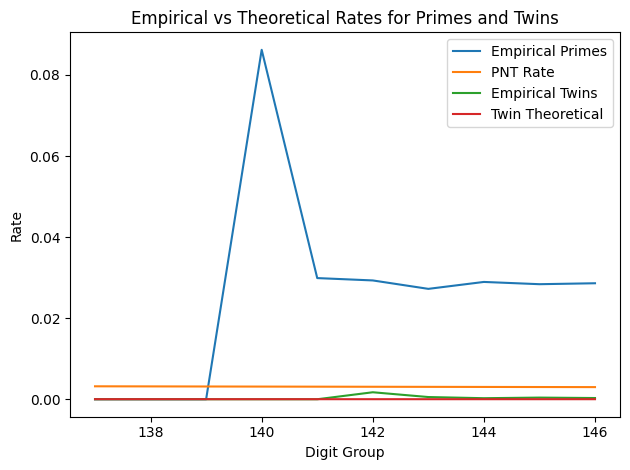


Primorial P_40# has 69 digits.
Theoretical prime enhancement E_prime: 9.32x
Theoretical twin enhancement E_twin: 32.90x
n= 40
Searching for primes based on P_40#...


Finding Primes: 100%|██████████| 60027/60027 [01:04<00:00, 927.68it/s] 


### Run Summary ###
Time: 64.71s | Cand: 120054 | Primes: 3508 | Twins: 42

### Detailed Stats for Primes and Twins ###

+-------+--------+-------+---------+---------+-----------+-----------+-------+---------+-----------+----------+----------+
|   Dig |   Cand |   #Pr | %Pr     | %PNT    | EffPNTx   |      pPNT |   #Tw | %Tw     | %TwinTh   | EffTwx   |    pTwin |
+=======+========+=======+=========+=========+===========+===========+=======+=========+===========+==========+==========+
|   136 |      2 |     0 | 0.000%% | 0.322%% | 0.00x     | 1         |     0 | 0.000%% | 0.001%%   | 0.00x    | 1        |
+-------+--------+-------+---------+---------+-----------+-----------+-------+---------+-----------+----------+----------+
|   137 |      6 |     0 | 0.000%% | 0.319%% | 0.00x     | 1         |     0 | 0.000%% | 0.001%%   | 0.00x    | 1        |
+-------+--------+-------+---------+---------+-----------+-----------+-------+---------+-----------+----------+----------+
|   138 |     20 

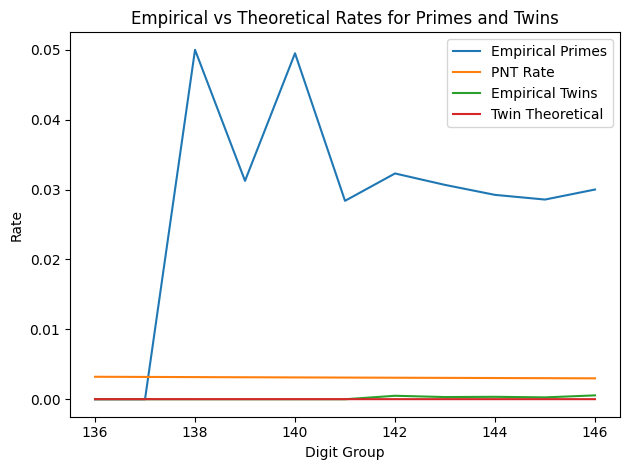


Primorial P_40# has 69 digits.
Theoretical prime enhancement E_prime: 9.32x
Theoretical twin enhancement E_twin: 32.90x
n= 40
Searching for primes based on P_40#...


Finding Primes: 100%|██████████| 60027/60027 [01:02<00:00, 957.81it/s] 



### Run Summary ###
Time: 62.67s | Cand: 120054 | Primes: 3393 | Twins: 45

### Detailed Stats for Primes and Twins ###

+-------+--------+-------+---------+---------+-----------+-----------+-------+---------+-----------+----------+----------+
|   Dig |   Cand |   #Pr | %Pr     | %PNT    | EffPNTx   |      pPNT |   #Tw | %Tw     | %TwinTh   | EffTwx   |    pTwin |
+=======+========+=======+=========+=========+===========+===========+=======+=========+===========+==========+==========+
|   135 |      2 |     0 | 0.000%% | 0.324%% | 0.00x     | 1         |     0 | 0.000%% | 0.001%%   | 0.00x    | 1        |
+-------+--------+-------+---------+---------+-----------+-----------+-------+---------+-----------+----------+----------+
|   136 |      4 |     0 | 0.000%% | 0.322%% | 0.00x     | 1         |     0 | 0.000%% | 0.001%%   | 0.00x    | 1        |
+-------+--------+-------+---------+---------+-----------+-----------+-------+---------+-----------+----------+----------+
|   137 |     14 

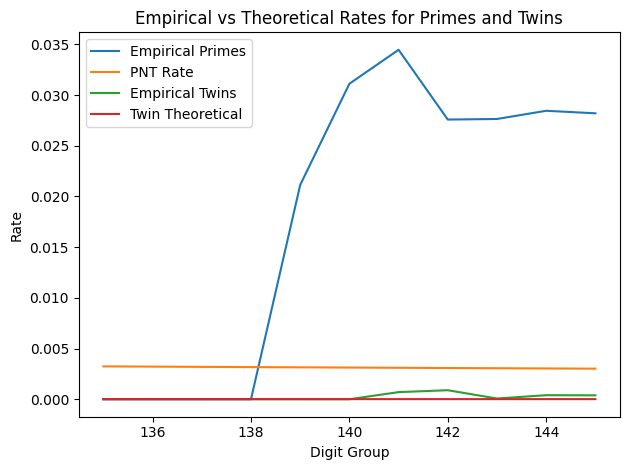


Primorial P_40# has 69 digits.
Theoretical prime enhancement E_prime: 9.32x
Theoretical twin enhancement E_twin: 32.90x
n= 40
Searching for primes based on P_40#...


Finding Primes: 100%|██████████| 60027/60027 [01:00<00:00, 993.80it/s] 



### Run Summary ###
Time: 60.40s | Cand: 120054 | Primes: 3455 | Twins: 43

### Detailed Stats for Primes and Twins ###

+-------+--------+-------+---------+---------+-----------+-----------+-------+---------+-----------+----------+----------+
|   Dig |   Cand |   #Pr | %Pr     | %PNT    | EffPNTx   |      pPNT |   #Tw | %Tw     | %TwinTh   | EffTwx   |    pTwin |
+=======+========+=======+=========+=========+===========+===========+=======+=========+===========+==========+==========+
|   135 |      4 |     0 | 0.000%% | 0.324%% | 0.00x     | 1         |     0 | 0.000%% | 0.001%%   | 0.00x    | 1        |
+-------+--------+-------+---------+---------+-----------+-----------+-------+---------+-----------+----------+----------+
|   136 |     12 |     0 | 0.000%% | 0.322%% | 0.00x     | 1         |     0 | 0.000%% | 0.001%%   | 0.00x    | 1        |
+-------+--------+-------+---------+---------+-----------+-----------+-------+---------+-----------+----------+----------+
|   137 |     38 

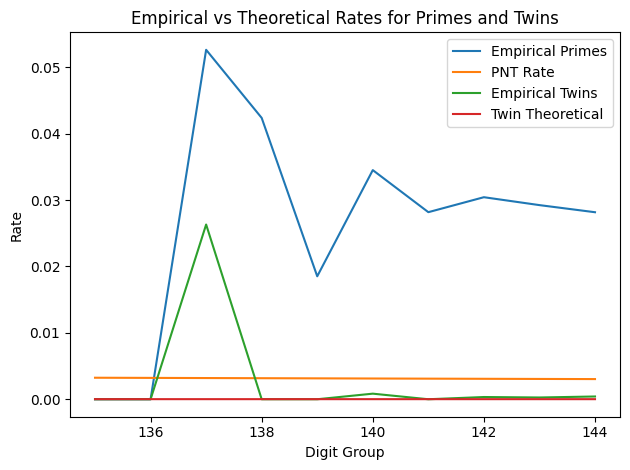

In [15]:
import sympy
import time
import pandas as pd
import sys
from tqdm import tqdm
import collections
from tabulate import tabulate
import math
from scipy.stats import binom
import matplotlib.pyplot as plt

sys.set_int_max_str_digits(0)

# --- Primality Helpers ---
def is_prime(n):
    return sympy.isprime(n)

# --- Enhancement Calculations ---
def compute_prime_enhancement(prime_list):
    """
    Computes enhancement factor E_prime = prod_{q in prime_list} q/(q-1)
    """
    enh = 1.0
    for q in prime_list:
        enh *= q / (q - 1)
    return enh


def compute_twin_enhancement(prime_list):
    """
    Computes enhancement factor E_twin = prod_{q in prime_list} q/(q-2)
    """
    enh = 1.0
    for q in prime_list:
        if q > 2:
            enh *= q / (q - 2)
    return enh

# --- Theoretical Rates ---
C2 = 0.66016  # Hardy–Littlewood twin constant

def pnt_rate(digits: int) -> float:
    if digits < 2:
        return 0.0
    return 1.0 / ((digits - 1) * math.log(10))


def twin_rate(digits: int) -> float:
    if digits < 3:
        return 0.0
    ln_term = (digits - 1) * math.log(10)
    return 2 * C2 / (ln_term * ln_term)


def binomial_p_value(successes: int, trials: int, p0: float) -> float:
    if trials == 0:
        return 1.0
    return binom.sf(successes - 1, trials, p0)

# --- Core Search Method ---
def find_twin_primes_your_method(number, limit, divisor=2):
    twin_primes = []
    primes_found = []
    candidate_counts_by_digit = collections.Counter()

    for n in tqdm(range(number, limit, number), desc="Finding Primes"):
        if n & 1 == 0:
            a = n // divisor
            p1 = a * n - 1
            p2 = a * n + 1
            if p1 % 6 == 1 or p1 % 6 == 5 or p2 % 6 == 1 or p2 % 6 == 5:
                d1, d2 = len(str(p1)), len(str(p2))
                candidate_counts_by_digit[d1] += 1
                candidate_counts_by_digit[d2] += 1
                if is_prime(p1):
                    primes_found.append(p1)
                if is_prime(p2):
                    primes_found.append(p2)
                if is_prime(p1) and is_prime(p2) and (p2 - p1 == 2):
                    twin_primes.append((p1, p2))

    return twin_primes, primes_found, candidate_counts_by_digit

# --- Testing Wrapper ---
def test_method(method, number, limit, divisor):
    start = time.time()
    twins, primes, counts = method(number, limit, divisor)
    elapsed = time.time() - start
    return twins, primes, counts, elapsed

# --- Primorial Input ---
def primes_info():
    while True:
        try:
            n = int(input("Enter the number of primes p# (n): "))
            divisor = int(input("Enter integer divisor: "))
            if n > 0 and divisor > 0:
                break
            print("Please enter positive integers.")
        except ValueError:
            print("Invalid input. Please enter integers.")
    primes = [sympy.prime(i) for i in range(1, n + 1)]
    product = sympy.prod(primes)
    num_digits = len(str(product))
    print(f"\nPrimorial P_{n}# has {num_digits} digits.")
    # Compute theoretical enhancements
    E_pr = compute_prime_enhancement(primes)
    E_tw = compute_twin_enhancement(primes)
    print(f"Theoretical prime enhancement E_prime: {E_pr:.2f}x")
    print(f"Theoretical twin enhancement E_twin: {E_tw:.2f}x")
    return product, num_digits, divisor, n, primes
def primes_info2(n,divisor):
    primes = [sympy.prime(i) for i in range(1, n + 1)]
    product = sympy.prod(primes)
    num_digits = len(str(product))
    print(f"\nPrimorial P_{n}# has {num_digits} digits.")
    # Compute theoretical enhancements
    E_pr = compute_prime_enhancement(primes)
    E_tw = compute_twin_enhancement(primes)
    print(f"Theoretical prime enhancement E_prime: {E_pr:.2f}x")
    print(f"Theoretical twin enhancement E_twin: {E_tw:.2f}x")
    return product, num_digits, divisor, n, primes
# --- Statistics Summarizer ---
def summarize_stats(candidate_counts, prime_counts, twin_counts):
    headers = [
        "Dig", "Cand",
        "#Pr", "%Pr", "%PNT", "EffPNTx", "pPNT",
        "#Tw", "%Tw", "%TwinTh", "EffTwx", "pTwin"
    ]
    rows = []
    data = []
    for d in sorted(candidate_counts):
        T = candidate_counts[d]
        m_pr = prime_counts.get(d, 0)
        m_tw = twin_counts.get(d, 0)
        p_pr = m_pr / T if T else 0.0
        p_tw = m_tw / T if T else 0.0
        p_pnt = pnt_rate(d)
        p_htw = twin_rate(d)
        rows.append([
            d, T,
            m_pr, f"{p_pr*100:.3f}%%", f"{p_pnt*100:.3f}%%", f"{(p_pr/p_pnt):.2f}x", f"{binomial_p_value(m_pr,T,p_pnt):.2e}",
            m_tw, f"{p_tw*100:.3f}%%", f"{p_htw*100:.3f}%%", f"{(p_tw/p_htw):.2f}x", f"{binomial_p_value(m_tw,T,p_htw):.2e}"
        ])
        data.append((d, p_pr, p_pnt, p_tw, p_htw))
    print(tabulate(rows, headers=headers, tablefmt="grid"))
    return data

# --- Plotting Function ---
def plot_rates(data):
    digits, emp_pr, pnt, emp_tw, twin_th = zip(*data)
    plt.figure()
    plt.plot(digits, emp_pr, label="Empirical Primes")
    plt.plot(digits, pnt, label="PNT Rate")
    plt.plot(digits, emp_tw, label="Empirical Twins")
    plt.plot(digits, twin_th, label="Twin Theoretical")
    plt.xlabel("Digit Group")
    plt.ylabel("Rate")
    plt.title("Empirical vs Theoretical Rates for Primes and Twins")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Main Execution ---
def main():
    num, digits, divisor, n, primes = primes_info()
    for div in [2,6,30,210]:
        num, digits, divisor, n, primes = primes_info2(n,div)
        print("n=", n)
        limit = 10**(digits + 4)
        print(f"Searching for primes based on P_{n}#...")

        twins, prime_list, counts, elapsed = \
            test_method(find_twin_primes_your_method, num, limit, div)
        total_cand = sum(counts.values())

        print("\n" + "="*50)
        print("### Run Summary ###")
        print("="*50)
        print(f"Time: {elapsed:.2f}s | Cand: {total_cand} | Primes: {len(prime_list)} | Twins: {len(twins)}")

        prime_ct = collections.Counter(len(str(p)) for p in prime_list)
        twin_ct  = collections.Counter(len(str(p1)) for p1, p2 in twins)
        print("\n### Detailed Stats for Primes and Twins ###\n")
        data = summarize_stats(counts, prime_ct, twin_ct)

        # Plot the rates
        plot_rates(data)

if __name__ == "__main__":
    main()


In [16]:
import sympy
import pandas as pd

def compute_prime_enhancement(n):
    """
    Single-prime enhancement:
      E_prime(n) = prod_{q <= p_n} q/(q-1)
    """
    p_n = sympy.prime(n)
    primes = list(sympy.primerange(1, p_n + 1))
    enh = 1.0
    for q in primes:
        enh *= q / (q - 1)
    return p_n, enh

def compute_twin_enhancement(n):
    """
    Twin-prime enhancement:
      E_twin(n) = prod_{3 <= q <= p_n} q/(q-2)
    """
    p_n = sympy.prime(n)
    primes = list(sympy.primerange(3, p_n + 1))
    enh = 1.0
    for q in primes:
        enh *= q / (q - 2)
    return enh

if __name__ == "__main__":
    # Example usage for different primorial orders:
    n_values = [2, 50, 100,3000000]
    for n in n_values:
        p_n, e_prime = compute_prime_enhancement(n)
        e_twin = compute_twin_enhancement(n)
        print(f"n={n}, p_n={p_n}: E_prime ≈ {e_prime:.4f}×, E_twin ≈ {e_twin:.4f}×")


n=2, p_n=3: E_prime ≈ 3.0000×, E_twin ≈ 3.0000×
n=50, p_n=229: E_prime ≈ 9.8003×, E_twin ≈ 36.3478×
n=100, p_n=541: E_prime ≈ 11.2676×, E_twin ≈ 48.0666×
n=3000000, p_n=49979687: E_prime ≈ 31.5736×, E_twin ≈ 377.5177×


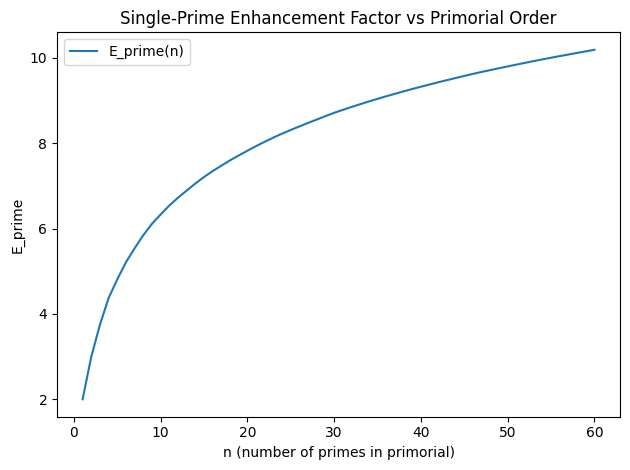

In [15]:
import sympy
import pandas as pd
import math
import matplotlib.pyplot as plt

# Compute enhancements and expected primes per 10000 candidates at x ~ P_n#
results = []
max_n = 60  # up to n=60 primes for demonstration

for n in range(1, max_n + 1):
    # list of first n primes
    primes = list(sympy.primerange(1, sympy.prime(n) + 1))
    # compute primorial log and P_n#
    ln_Pn = sum(math.log(p) for p in primes)
    # compute enhancements
    E_prime = math.prod(p / (p - 1) for p in primes)
    # baseline PNT rate at x = P_n#
    p_pnt = 1 / ln_Pn if ln_Pn > 0 else 0
    # expected primes per 10000 candidates
    exp_primes_10k = 10000 * E_prime * p_pnt
    results.append({
        "n": n,
        "p_n": sympy.prime(n),
        "E_prime": E_prime,
        "ln(P_n#)": ln_Pn,
        "PNT rate": p_pnt,
        "Exp primes/10k": exp_primes_10k
    })

df = pd.DataFrame(results)

# Display the DataFrame
#import ace_tools as tools; tools.display_dataframe_to_user("Enhancement and Expected Yield", df)

# Plot E_prime vs n
plt.figure()
plt.plot(df["n"], df["E_prime"], label="E_prime(n)")
plt.xlabel("n (number of primes in primorial)")
plt.ylabel("E_prime")
plt.title("Single-Prime Enhancement Factor vs Primorial Order")
plt.legend()
plt.tight_layout()
plt.show()


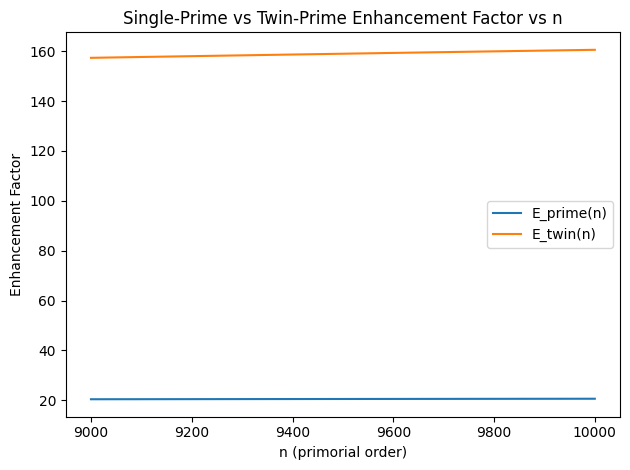

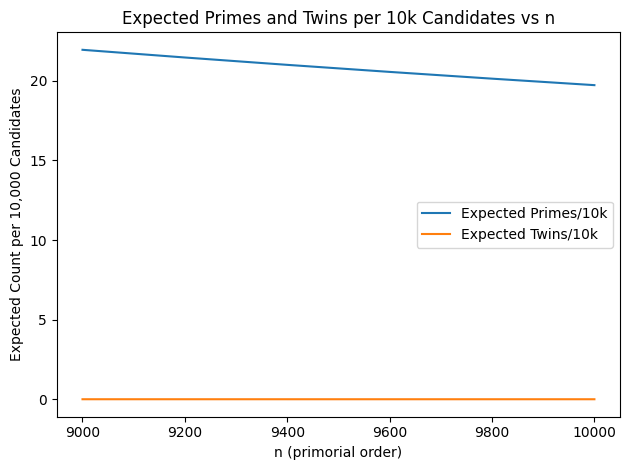

[{'n': 9000, 'p_n': 93179, 'ln(P_n#)': 92890.44265959859, 'E_prime': 20.38619997729077, 'E_twin': 157.38443958495253, 'PNT_rate': 1.076537016477085e-05, 'Twin_rate': 1.5301610293792168e-10, 'Exp_primes_per_10k': 21.94649890085782, 'Exp_twins_per_10k': 0.002408235360835821}, {'n': 9200, 'p_n': 95441, 'ln(P_n#)': 95181.36270541509, 'E_prime': 20.42946829168151, 'E_twin': 158.05322751560075, 'PNT_rate': 1.0506258489857781e-05, 'Twin_rate': 1.457388591111213e-10, 'Exp_primes_per_10k': 21.46372746827592, 'Exp_twins_per_10k': 0.002303449705695414}, {'n': 9400, 'p_n': 97813, 'ln(P_n#)': 97477.00648727795, 'E_prime': 20.47181530364154, 'E_twin': 158.70914801448652, 'PNT_rate': 1.025882960542611e-05, 'Twin_rate': 1.3895520997974017e-10, 'Exp_primes_per_10k': 21.001686491381314, 'Exp_twins_per_10k': 0.0022053462988058637}, {'n': 9600, 'p_n': 100109, 'ln(P_n#)': 99777.49719057734, 'E_prime': 20.513232899973634, 'E_twin': 159.35198638424072, 'PNT_rate': 1.0022299898843692e-05, 'Twin_rate': 1.32621

In [2]:
import sympy
import pandas as pd
import math
import matplotlib.pyplot as plt

# Constants
C2 = 0.66016  # Hardy–Littlewood twin constant

# Calculate enhancements and expected yields
results = []
max_n = 10000  # Primorial order range

for n in range(9000, max_n + 1,200):
    # primes up to p_n
    primes = list(sympy.primerange(1, sympy.prime(n) + 1))
    # log of primorial P_n#
    ln_Pn = sum(math.log(p) for p in primes)
    # Single-prime enhancement
    E_prime = math.prod(p / (p - 1) for p in primes)
    # Twin-prime enhancement
    twin_primes = [p for p in primes if p > 2]
    E_twin = math.prod(p / (p - 2) for p in twin_primes)
    # Theoretical rates
    p_pnt = 1 / ln_Pn if ln_Pn > 0 else 0
    p_htw = 2 * C2 / (ln_Pn * ln_Pn) if ln_Pn > 0 else 0
    # Expected yields per 10k candidates
    exp_primes_10k = 100000 * E_prime * p_pnt
    exp_twins_10k = 100000 * E_twin * p_htw
    
    results.append({
        "n": n,
        "p_n": sympy.prime(n),
        "ln(P_n#)": ln_Pn,
        "E_prime": E_prime,
        "E_twin": E_twin,
        "PNT_rate": p_pnt,
        "Twin_rate": p_htw,
        "Exp_primes_per_10k": exp_primes_10k,
        "Exp_twins_per_10k": exp_twins_10k
    })

df = pd.DataFrame(results)



# Plot E_prime and E_twin vs n
plt.figure()
plt.plot(df["n"], df["E_prime"], label="E_prime(n)")
plt.plot(df["n"], df["E_twin"], label="E_twin(n)")
plt.xlabel("n (primorial order)")
plt.ylabel("Enhancement Factor")
plt.title("Single-Prime vs Twin-Prime Enhancement Factor vs n")
plt.legend()
plt.tight_layout()
plt.show()

# Plot expected primes and twins per 10k candidates vs n
plt.figure()
plt.plot(df["n"], df["Exp_primes_per_10k"], label="Expected Primes/10k")
plt.plot(df["n"], df["Exp_twins_per_10k"], label="Expected Twins/10k")
plt.xlabel("n (primorial order)")
plt.ylabel("Expected Count per 10,000 Candidates")
plt.title("Expected Primes and Twins per 10k Candidates vs n")
plt.legend()
plt.tight_layout()
plt.show()
print(results)


In [32]:
import math

def digits_in_primorial(n):
    if n < 2:
        return 1
    return int(n * math.log(n) / math.log(10)) + 1

# Example:
for n in [10, 50, 100, 200, 500, 10000000]:
    print(f"P_{n}# has ~{digits_in_primorial(n)} digits")


P_10# has ~11 digits
P_50# has ~85 digits
P_100# has ~201 digits
P_200# has ~461 digits
P_500# has ~1350 digits
P_10000000# has ~70000001 digits


In [ ]:
import sympy
import time
import pandas as pd
import sys
from tqdm import tqdm
import collections
from tabulate import tabulate
import math
from scipy.stats import binom
import matplotlib.pyplot as plt

sys.set_int_max_str_digits(0)

# --- Primality Helpers ---
def is_prime(n):
    return sympy.isprime(n)

# --- Enhancement Calculations ---
def compute_prime_enhancement(prime_list):
    """
    Computes enhancement factor E_prime = prod_{q in prime_list} q/(q-1)
    """
    enh = 1.0
    for q in prime_list:
        enh *= q / (q - 1)
    return enh


def compute_twin_enhancement(prime_list):
    """
    Computes enhancement factor E_twin = prod_{q in prime_list} q/(q-2)
    """
    enh = 1.0
    for q in prime_list:
        if q > 2:
            enh *= q / (q - 2)
    return enh

# --- Theoretical Rates ---
C2 = 0.66016  # Hardy–Littlewood twin constant

def pnt_rate(digits: int) -> float:
    if digits < 2:
        return 0.0
    return 1.0 / ((digits - 1) * math.log(10))


def twin_rate(digits: int) -> float:
    if digits < 3:
        return 0.0
    ln_term = (digits - 1) * math.log(10)
    return 2 * C2 / (ln_term * ln_term)


def binomial_p_value(successes: int, trials: int, p0: float) -> float:
    if trials == 0:
        return 1.0
    return binom.sf(successes - 1, trials, p0)

# --- Core Search Method ---
def find_twin_primes_your_method(number, limit, divisor=2):
    twin_primes = []
    primes_found = []
    candidate_counts_by_digit = collections.Counter()

    for n in tqdm(range(number, limit, number), desc="Finding Primes"):
        if n & 1 == 0:
            a = n // divisor
            p1 = a * n - 1
            p2 = a * n + 1
            if p1 % 6 == 1 or p1 % 6 == 5 or p2 % 6 == 1 or p2 % 6 == 5:
                d1, d2 = len(str(p1)), len(str(p2))
                candidate_counts_by_digit[d1] += 1
                candidate_counts_by_digit[d2] += 1
                if is_prime(p1):
                    primes_found.append(p1)
                if is_prime(p2):
                    primes_found.append(p2)
                if is_prime(p1) and is_prime(p2) and (p2 - p1 == 2):
                    twin_primes.append((p1, p2))

    return twin_primes, primes_found, candidate_counts_by_digit

# --- Testing Wrapper ---
def test_method(method, number, limit, divisor):
    start = time.time()
    twins, primes, counts = method(number, limit, divisor)
    elapsed = time.time() - start
    return twins, primes, counts, elapsed

# --- Primorial Input ---
def primes_info():
    while True:
        try:
            n = int(input("Enter the number of primes p# (n): "))
            divisor = int(input("Enter integer divisor: "))
            if n > 0 and divisor > 0:
                break
            print("Please enter positive integers.")
        except ValueError:
            print("Invalid input. Please enter integers.")
    primes = [sympy.prime(i) for i in range(1, n + 1)]
    product = sympy.prod(primes)
    num_digits = len(str(product))
    print(f"\nPrimorial P_{n}# has {num_digits} digits.")
    # Compute theoretical enhancements
    E_pr = compute_prime_enhancement(primes)
    E_tw = compute_twin_enhancement(primes)
    print(f"Theoretical prime enhancement E_prime: {E_pr:.2f}x")
    print(f"Theoretical twin enhancement E_twin: {E_tw:.2f}x")
    return product, num_digits, divisor, n, primes
def primes_info2(n,divisor):
    primes = [sympy.prime(i) for i in range(1, n + 1)]
    product = sympy.prod(primes)
    num_digits = len(str(product))
    print(f"\nPrimorial P_{n}# has {num_digits} digits.")
    # Compute theoretical enhancements
    E_pr = compute_prime_enhancement(primes)
    E_tw = compute_twin_enhancement(primes)
    print(f"Theoretical prime enhancement E_prime: {E_pr:.2f}x")
    print(f"Theoretical twin enhancement E_twin: {E_tw:.2f}x")
    return product, num_digits, divisor, n, primes
# --- Statistics Summarizer ---
def summarize_stats(candidate_counts, prime_counts, twin_counts):
    headers = [
        "Dig", "Cand",
        "#Pr", "%Pr", "%PNT", "EffPNTx", "pPNT",
        "#Tw", "%Tw", "%TwinTh", "EffTwx", "pTwin"
    ]
    rows = []
    data = []
    for d in sorted(candidate_counts):
        T = candidate_counts[d]
        m_pr = prime_counts.get(d, 0)
        m_tw = twin_counts.get(d, 0)
        p_pr = m_pr / T if T else 0.0
        p_tw = m_tw / T if T else 0.0
        p_pnt = pnt_rate(d)
        p_htw = twin_rate(d)
        rows.append([
            d, T,
            m_pr, f"{p_pr*100:.3f}%%", f"{p_pnt*100:.3f}%%", f"{(p_pr/p_pnt):.2f}x", f"{binomial_p_value(m_pr,T,p_pnt):.2e}",
            m_tw, f"{p_tw*100:.3f}%%", f"{p_htw*100:.3f}%%", f"{(p_tw/p_htw):.2f}x", f"{binomial_p_value(m_tw,T,p_htw):.2e}"
        ])
        data.append((d, p_pr, p_pnt, p_tw, p_htw))
    print(tabulate(rows, headers=headers, tablefmt="grid"))
    return data

# --- Plotting Function ---
def plot_rates(data):
    digits, emp_pr, pnt, emp_tw, twin_th = zip(*data)
    plt.figure()
    plt.plot(digits, emp_pr, label="Empirical Primes")
    plt.plot(digits, pnt, label="PNT Rate")
    plt.plot(digits, emp_tw, label="Empirical Twins")
    plt.plot(digits, twin_th, label="Twin Theoretical")
    plt.xlabel("Digit Group")
    plt.ylabel("Rate")
    plt.title("Empirical vs Theoretical Rates for Primes and Twins")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Main Execution ---
def main():
    num, digits, divisor, n, primes = primes_info()
    for div in [2,6,30,210]:
        num, digits, divisor, n, primes = primes_info2(n,div)
        print("n=", n)
        limit = 10**(digits + 4)
        print(f"Searching for primes based on P_{n}#...")

        twins, prime_list, counts, elapsed = \
            test_method(find_twin_primes_your_method, num, limit, div)
        total_cand = sum(counts.values())

        print("\n" + "="*50)
        print("### Run Summary ###")
        print("="*50)
        print(f"Time: {elapsed:.2f}s | Cand: {total_cand} | Primes: {len(prime_list)} | Twins: {len(twins)}")

        prime_ct = collections.Counter(len(str(p)) for p in prime_list)
        twin_ct  = collections.Counter(len(str(p1)) for p1, p2 in twins)
        print("\n### Detailed Stats for Primes and Twins ###\n")
        data = summarize_stats(counts, prime_ct, twin_ct)

        # Plot the rates
        plot_rates(data)

if __name__ == "__main__":
    main()
